## Dataset ===>> https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv("./../data/raw/Starbucks Customer Survey/Starbucks satisfactory survey.csv")

In [4]:
data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [5]:
data.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Starbucks?',
       '6. How do you usually enjoy Starbucks?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Starbucks's outlet to you is...?',
       '9. Do you have Starbucks membership card?',
       '10. What do you most frequently purchase at Starbucks?',
       '11. On average, how much would you spend at Starbucks per visit?',
       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Starbucks?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Starbucks as..',
       '17. How would you rate the service at 

In [6]:
data.drop('Timestamp',inplace=True,axis=1)
data.drop('19. How do you come to hear of promotions at Starbucks? Check all that apply.',inplace=True,axis=1)
data.drop('16. You rate the WiFi quality at Starbucks as..',inplace=True,axis=1)
data.drop('18. How likely you will choose Starbucks for doing business meetings or hangout with friends?',inplace=True,axis=1)

In [7]:
#let's change column names
data.columns=['Gender','Age','Occupation','Income','Frequency','OrderType','TimeSpent','Distance','Membership','FrequentlyPur','MoneySpent','Rating','PriceRating','SalesRating','Ambiance','Service','Continuation']

In [8]:
data.head()

,Gender,Age,Occupation,Income,Frequency,OrderType,TimeSpent,Distance,Membership,FrequentlyPur,MoneySpent,Rating,PriceRating,SalesRating,Ambiance,Service,Continuation
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,5,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,3,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         122 non-null    object
 1   Age            122 non-null    object
 2   Occupation     122 non-null    object
 3   Income         122 non-null    object
 4   Frequency      122 non-null    object
 5   OrderType      121 non-null    object
 6   TimeSpent      122 non-null    object
 7   Distance       122 non-null    object
 8   Membership     122 non-null    object
 9   FrequentlyPur  122 non-null    object
 10  MoneySpent     122 non-null    object
 11  Rating         122 non-null    int64 
 12  PriceRating    122 non-null    int64 
 13  SalesRating    122 non-null    int64 
 14  Ambiance       122 non-null    int64 
 15  Service        122 non-null    int64 
 16  Continuation   122 non-null    object
dtypes: int64(5), object(12)
memory usage: 16.3+ KB


In [10]:
# Check missing value
data.isnull().sum().to_frame('NaN value').T

,Gender,Age,Occupation,Income,Frequency,OrderType,TimeSpent,Distance,Membership,FrequentlyPur,MoneySpent,Rating,PriceRating,SalesRating,Ambiance,Service,Continuation
NaN value,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# more details
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Rating,122.0,3.663934,0.941343,1.0,3.0,4.0,4.0,5.0
PriceRating,122.0,2.893443,1.081836,1.0,2.0,3.0,4.0,5.0
SalesRating,122.0,3.795082,1.090443,1.0,3.0,4.0,5.0,5.0
Ambiance,122.0,3.754098,0.929867,1.0,3.0,4.0,4.0,5.0
Service,122.0,3.745902,0.828834,1.0,3.0,4.0,4.0,5.0


In [12]:
data.describe(include=[object]).T

,count,unique,top,freq
Gender,122,2,Female,65
Age,122,4,From 20 to 29,85
Occupation,122,4,Employed,61
Income,122,5,"Less than RM25,000",71
Frequency,122,5,Rarely,76
OrderType,121,8,Take away,49
TimeSpent,122,5,Below 30 minutes,73
Distance,122,3,more than 3km,61
Membership,122,2,No,62
FrequentlyPur,122,20,Coffee,65


In [13]:
# Separate categorical and continuous columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
continuous_cols = data.select_dtypes(exclude=['object']).columns.tolist()

Value Counts for Gender:
Gender
Female    65
Male      57
Name: count, dtype: int64



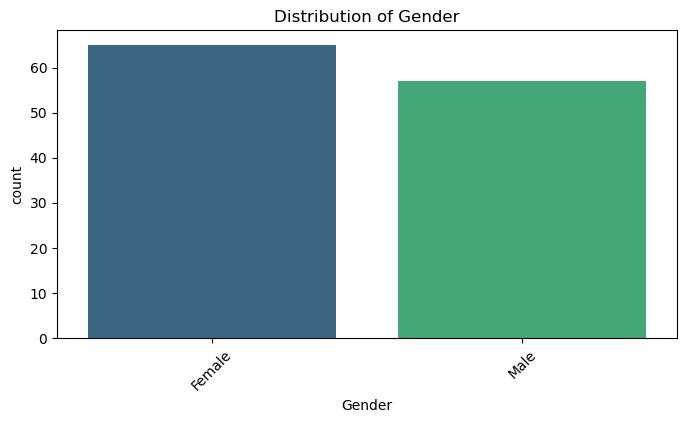

Value Counts for Age:
Age
From 20 to 29    85
From 30 to 39    17
Below 20         13
40 and above      7
Name: count, dtype: int64



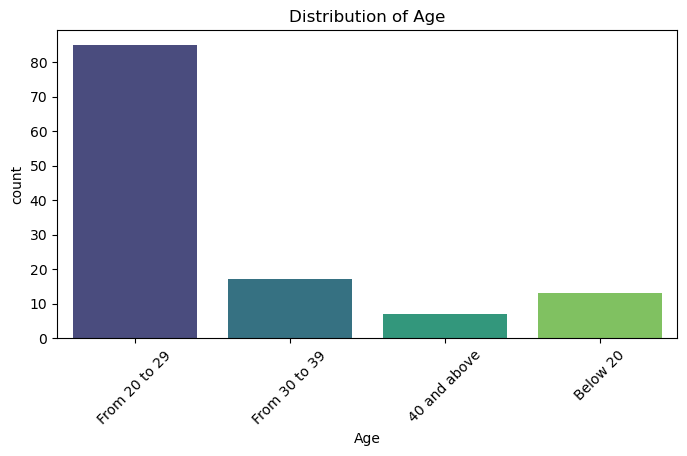

Value Counts for Occupation:
Occupation
Employed         61
Student          42
Self-employed    17
Housewife         2
Name: count, dtype: int64



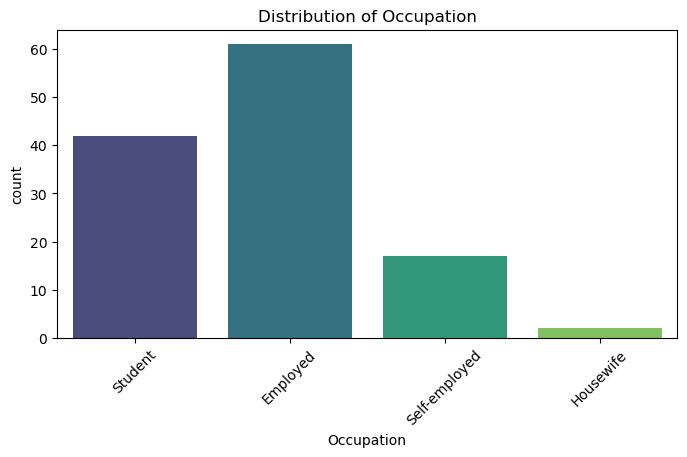

Value Counts for Income:
Income
Less than RM25,000       71
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: count, dtype: int64



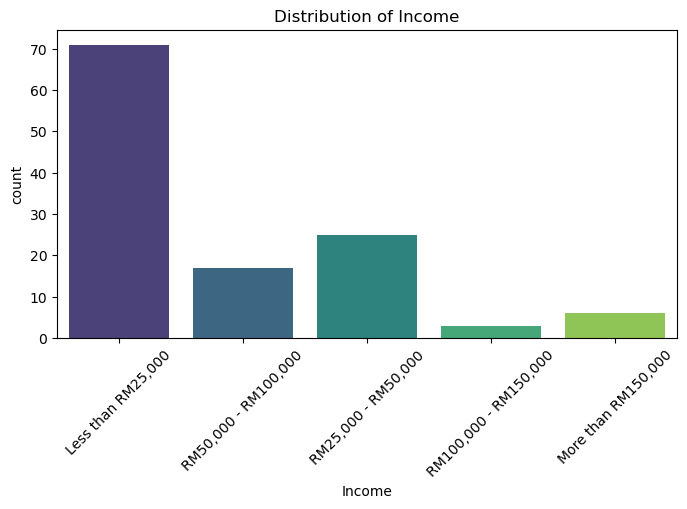

Value Counts for Frequency:
Frequency
Rarely     76
Monthly    26
Weekly      9
Never       9
Daily       2
Name: count, dtype: int64



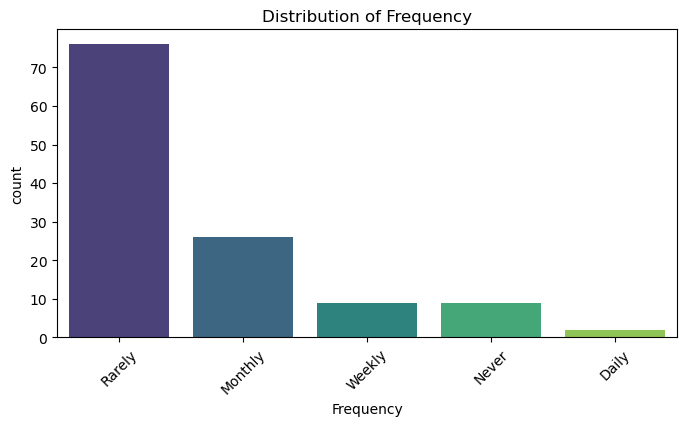

Value Counts for OrderType:
OrderType
Take away             49
Dine in               46
Drive-thru            20
never                  2
Never buy              1
I dont like coffee     1
Never                  1
Never                  1
Name: count, dtype: int64



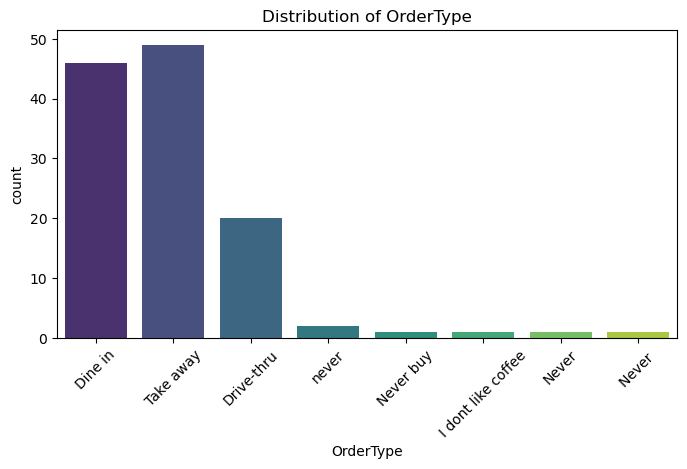

Value Counts for TimeSpent:
TimeSpent
Below 30 minutes                73
Between 30 minutes to 1 hour    34
Between 1 hour to 2 hours       12
More than 3 hours                2
Between 2 hours to 3 hours       1
Name: count, dtype: int64



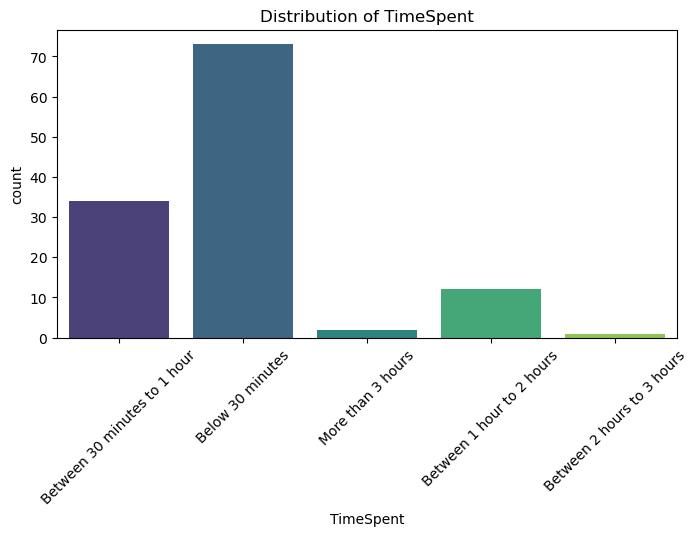

Value Counts for Distance:
Distance
more than 3km    61
1km - 3km        34
within 1km       27
Name: count, dtype: int64



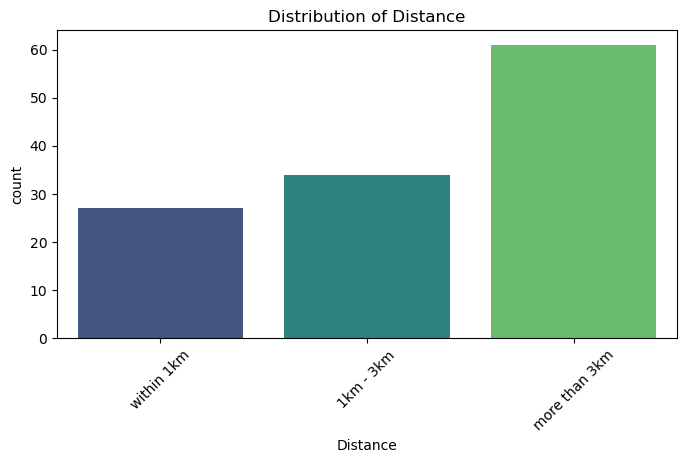

Value Counts for Membership:
Membership
No     62
Yes    60
Name: count, dtype: int64



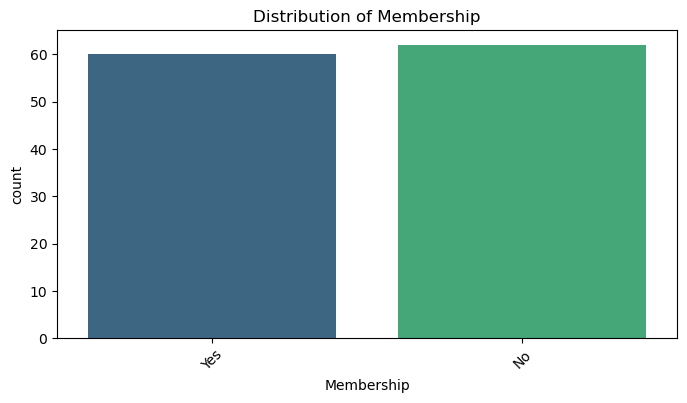

Value Counts for FrequentlyPur:
FrequentlyPur
Coffee                                           65
Cold drinks                                      25
Coffee;Cold drinks                                6
Coffee;Pastries                                   6
Coffee;Sandwiches                                 3
Cold drinks;Juices;Pastries                       2
Pastries                                          2
Jaws chip                                         1
Nothing                                           1
never                                             1
Cold drinks;Never                                 1
cake                                              1
Coffee;Cold drinks;Pastries;Sandwiches            1
Never buy any                                     1
Never                                             1
Cold drinks;Pastries                              1
Coffee;Pastries;Sandwiches                        1
Coffee;Juices;Pastries;Sandwiches                 1
Cold drinks;Pastri

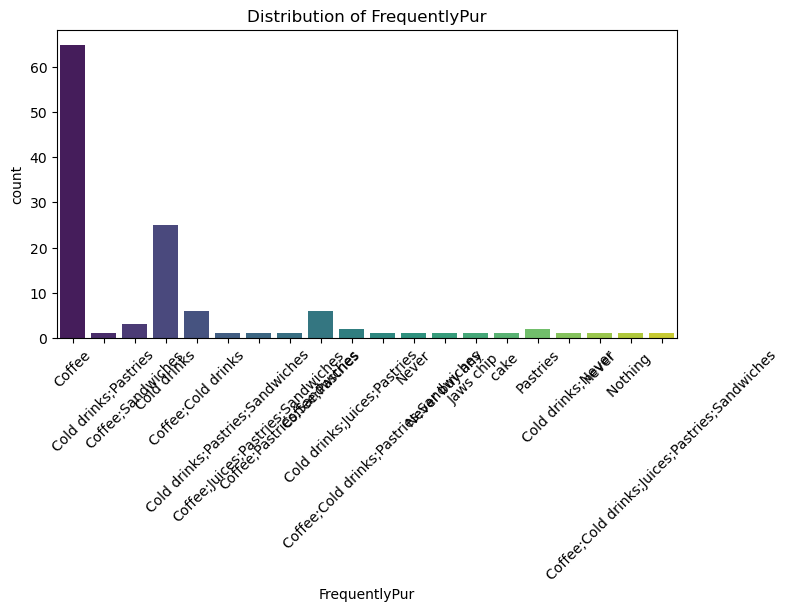

Value Counts for MoneySpent:
MoneySpent
Less than RM20        58
Around RM20 - RM40    45
Zero                  12
More than RM40         7
Name: count, dtype: int64



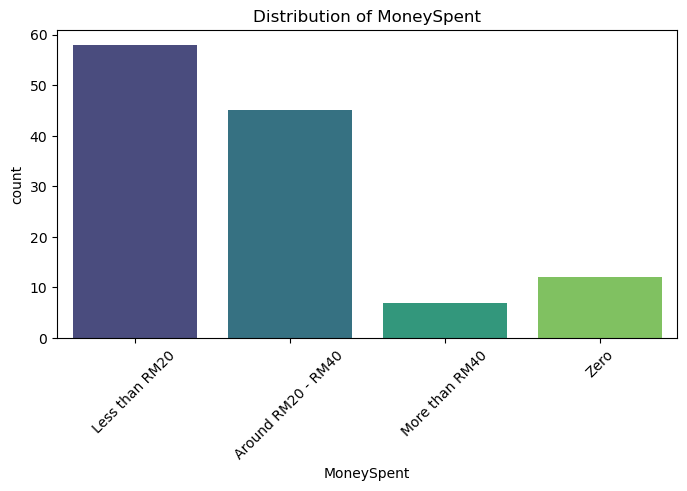

Value Counts for Continuation:
Continuation
Yes    94
No     28
Name: count, dtype: int64



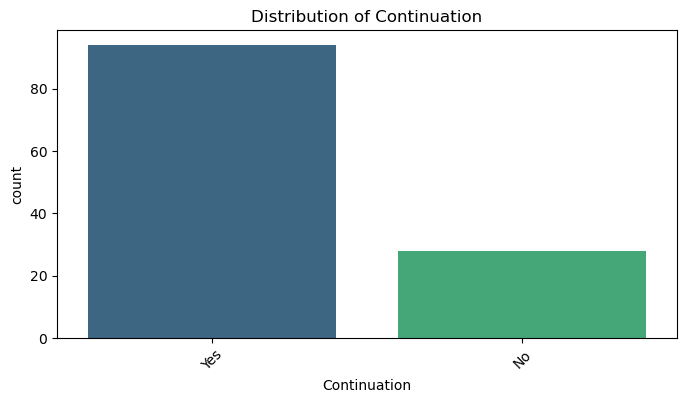

In [20]:
# Display value counts and plot countplots for categorical variables
for col in categorical_cols:
    print(f"Value Counts for {col}:\n{data[col].value_counts()}\n")
    
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

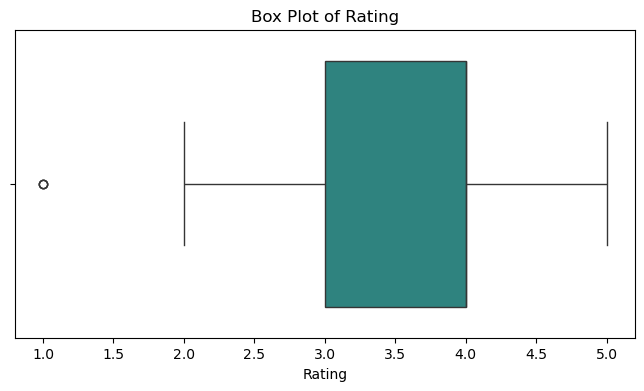

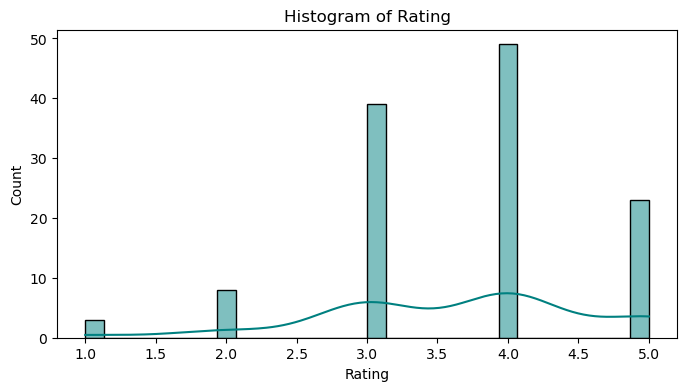

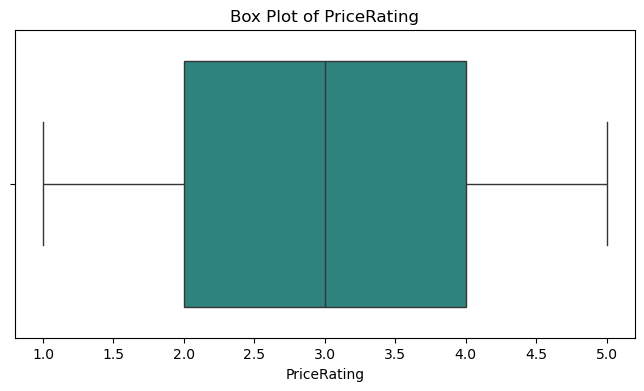

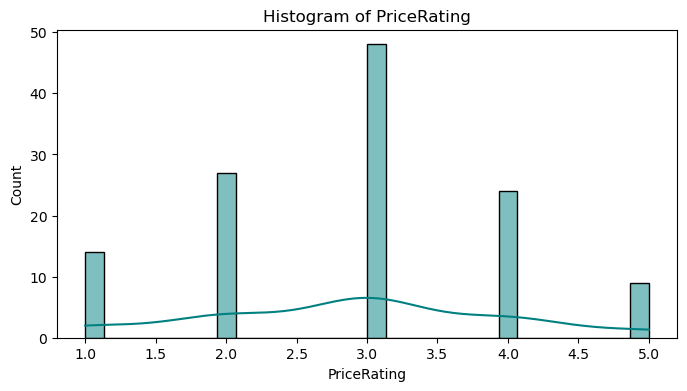

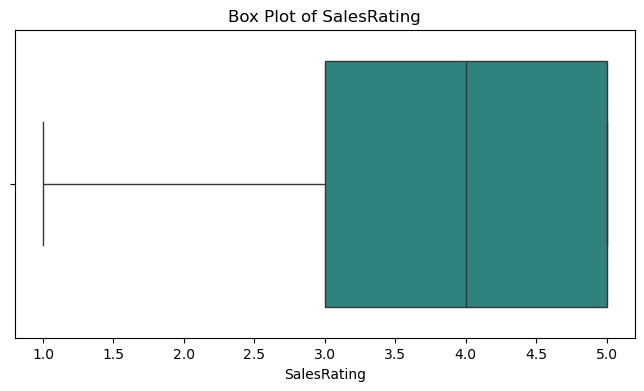

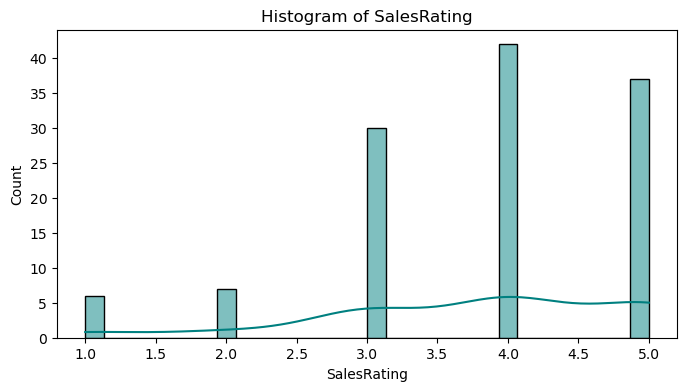

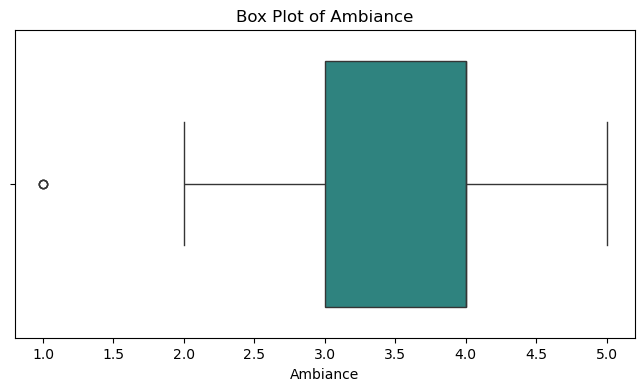

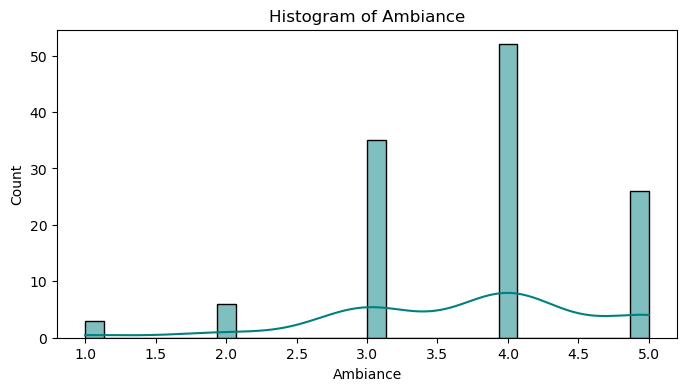

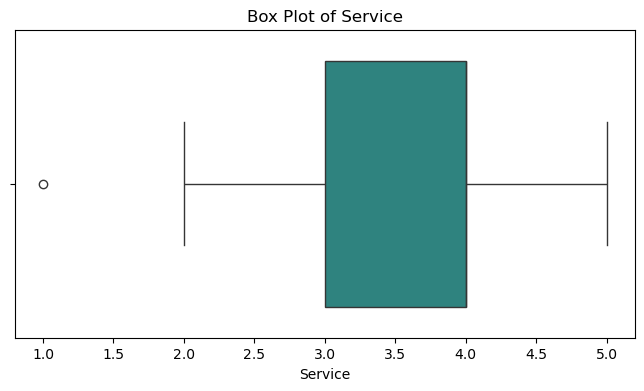

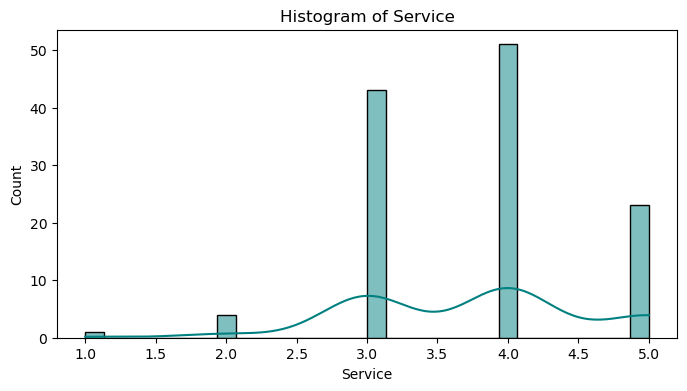

In [21]:
# Generate box plots and histograms for continuous variables
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, palette="viridis")
    plt.title(f"Box Plot of {col}")
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, kde=True, bins=30, color="teal")
    plt.title(f"Histogram of {col}")
    plt.show()

In [22]:
#Transform continous into categorical variables

from sklearn.preprocessing import LabelEncoder

def label_encode_df(data):
    data = data.copy()  # Avoid modifying the original DataFrame
    le = LabelEncoder()
    
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = le.fit_transform(data[col])
    
    return data

# Apply label encoding to categorical columns
data = label_encode_df(data)
data.head()


,Gender,Age,Occupation,Income,Frequency,OrderType,TimeSpent,Distance,Membership,FrequentlyPur,MoneySpent,Rating,PriceRating,SalesRating,Ambiance,Service,Continuation
0,0,2,3,0,3,0,3,2,1,0,1,4,3,5,5,4,1
1,0,2,3,0,3,6,0,0,1,11,1,4,3,4,4,5,1
2,1,2,0,0,1,0,3,1,1,0,1,4,3,4,4,4,1
3,0,2,3,0,3,6,0,1,0,0,1,2,1,4,3,3,0
4,1,2,3,0,1,6,3,0,0,7,0,3,3,4,2,3,1


## Predictions Using Naive Bayes Class

In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
y = data["Continuation"]
X = data.drop(["Continuation"],axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=529)

In [24]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

In [25]:
# Define accuracy function
def accuracy(y_pred, y_true):
    """
    Computes the accuracy of the predictions.
    
    Parameters:
    y_pred (array-like): Predicted labels
    y_true (array-like): True labels
    
    Returns:
    float: Accuracy score
    """
    return np.mean(y_pred == y_true)

# Calculate accuracy
accuracy_score = accuracy(y_pred, y_test)

# Display the result
print(f"The accuracy of our test model is {accuracy_score:.4f}")

The accuracy of our test model is 0.8000
